한글 깨짐 처리하기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


부산의 최고, 최저, 평균 기온 히스토그램으로 나타내기

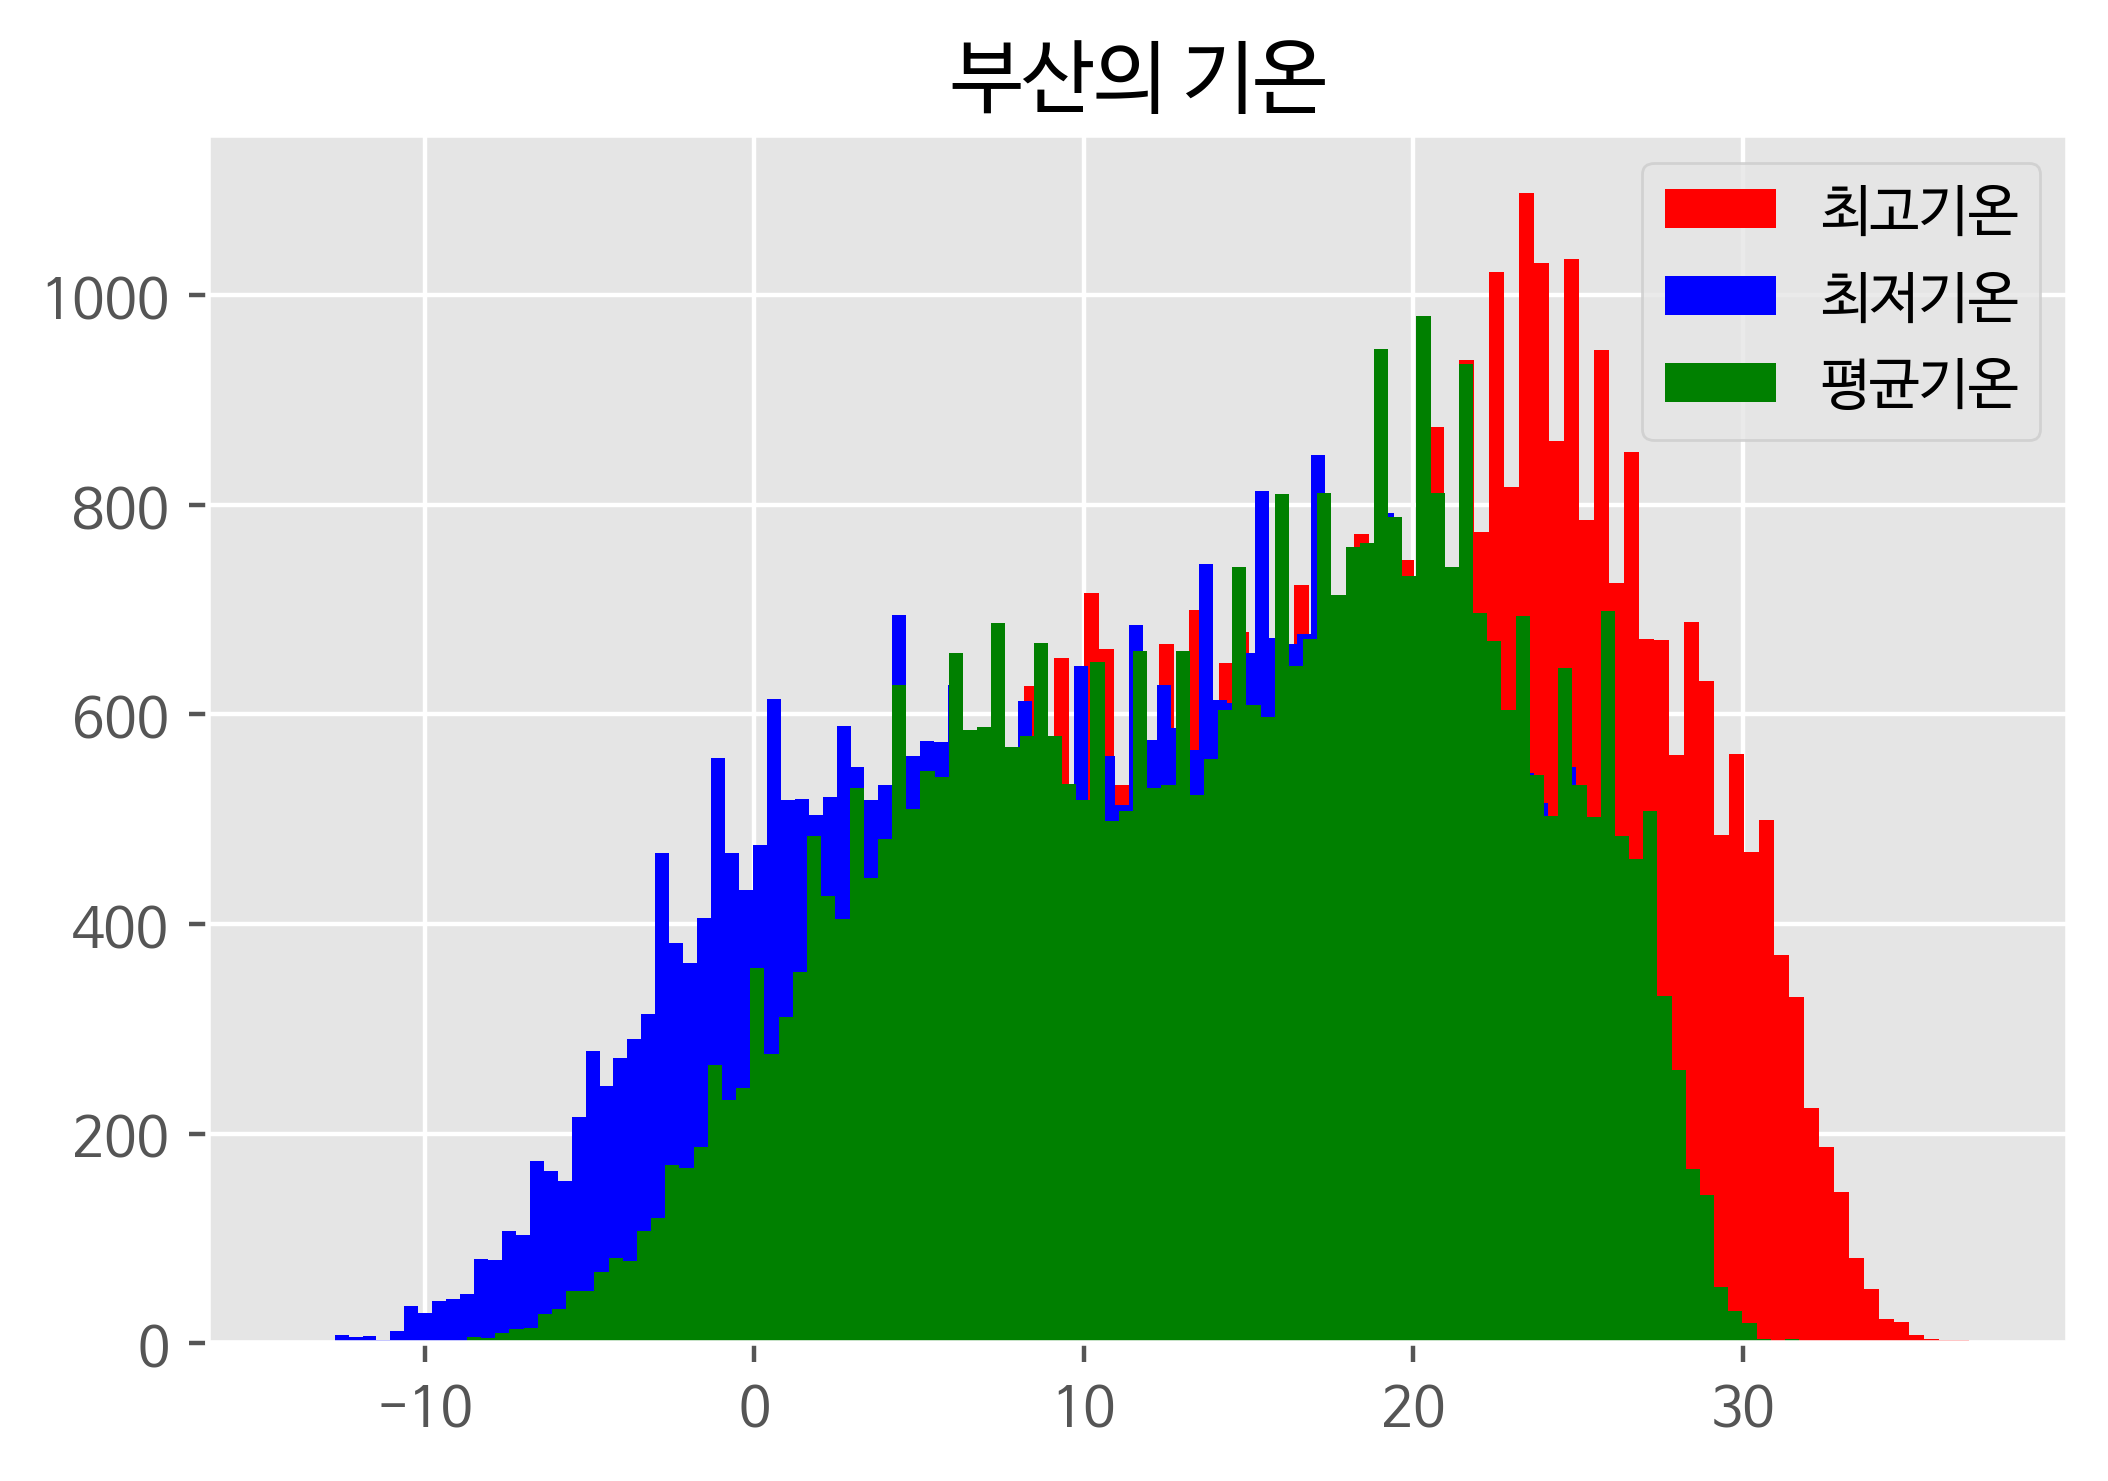

In [ ]:
import csv
import matplotlib.pyplot as plt 

f = open('/content/busan_temp.csv', encoding='cp949')
data = csv.reader(f)
next(data)

high = [] # 최고 기온 데이터를 저장할 리스트 생성
avg = [] # 평균 기온 데이터 저장할 리스트 생성
low = [] # 최저 기온 데이터 저장할 리스트 생성

for row in data:
  if row[-1] != '':
    high.append(float(row[-1]))
  if row[-2] != '':
    low.append(float(row[-2]))
  if row[-3] != '':
    avg.append(float(row[-3]))



# 최고 기온 데이터의 히스토그램
plt.figure(dpi=200)
plt.title('부산의 기온')
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.hist(high, bins=100, color = 'r',label='최고기온')
plt.hist(low, bins=100, color = 'b',label='최저기온')
plt.hist(avg, bins=100, color = 'g',label = '평균기온')
plt.legend() 
plt.show()

2) 상자그림을 활용한 부산 최고 기온 vs 서울 최고 기온


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


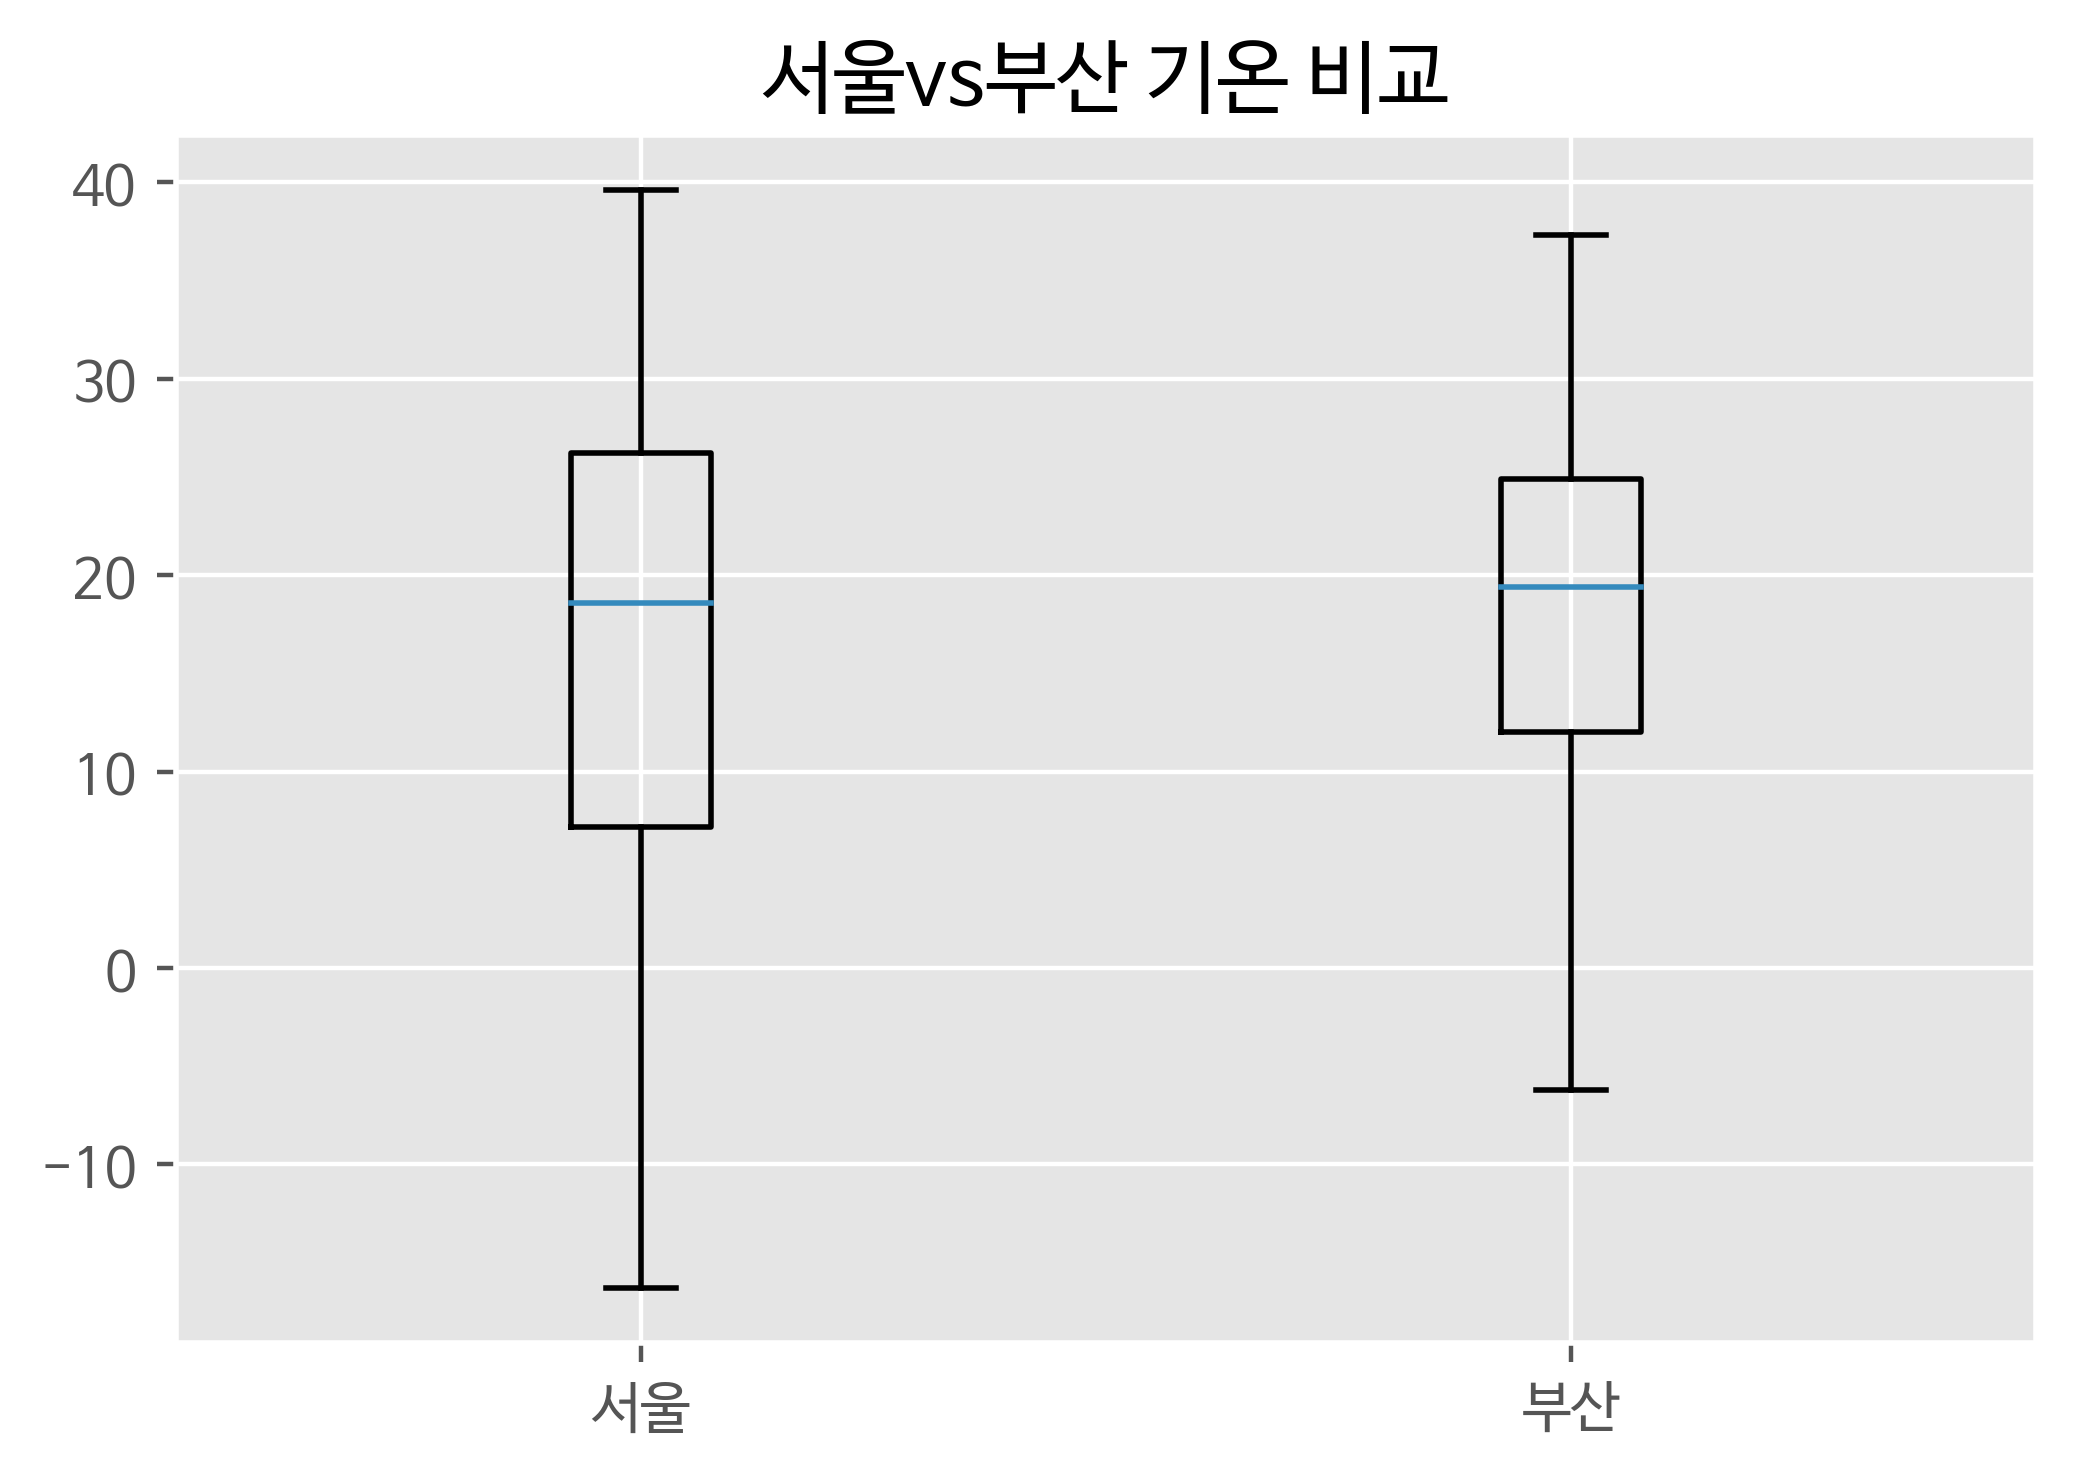

In [ ]:
import csv
import matplotlib.pyplot as plt 

f1 = open('/content/seoul.csv', encoding='cp949')
data_seoul = csv.reader(f1)
next(data_seoul) 

f = open('/content/busan_temp.csv', encoding='cp949')
data_busan = csv.reader(f)
next(data_busan) 

seoul_htemp = [] # 서울 기온 데이터를 저장할 리스트 생성
busan_htemp = [] # 부산 기온 데이터를 저장할 리스트 생성

for row in data_seoul:
  if row[-1] != '':
    seoul_htemp.append(float(row[-1]))

for row in data_busan:
  if row[-1] !='':
    busan_htemp.append(float(row[-1]))
 
# 서울, 부산 기온 비교 히스토그램
plt.figure(dpi=200)
plt.title('서울vs부산 기온 비교')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.rc('font', family = 'NanumBarunGothic')
plt.boxplot([seoul_htemp,busan_htemp],labels=['서울','부산'],showfliers=False)
plt.show()

3) 월별 최고기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


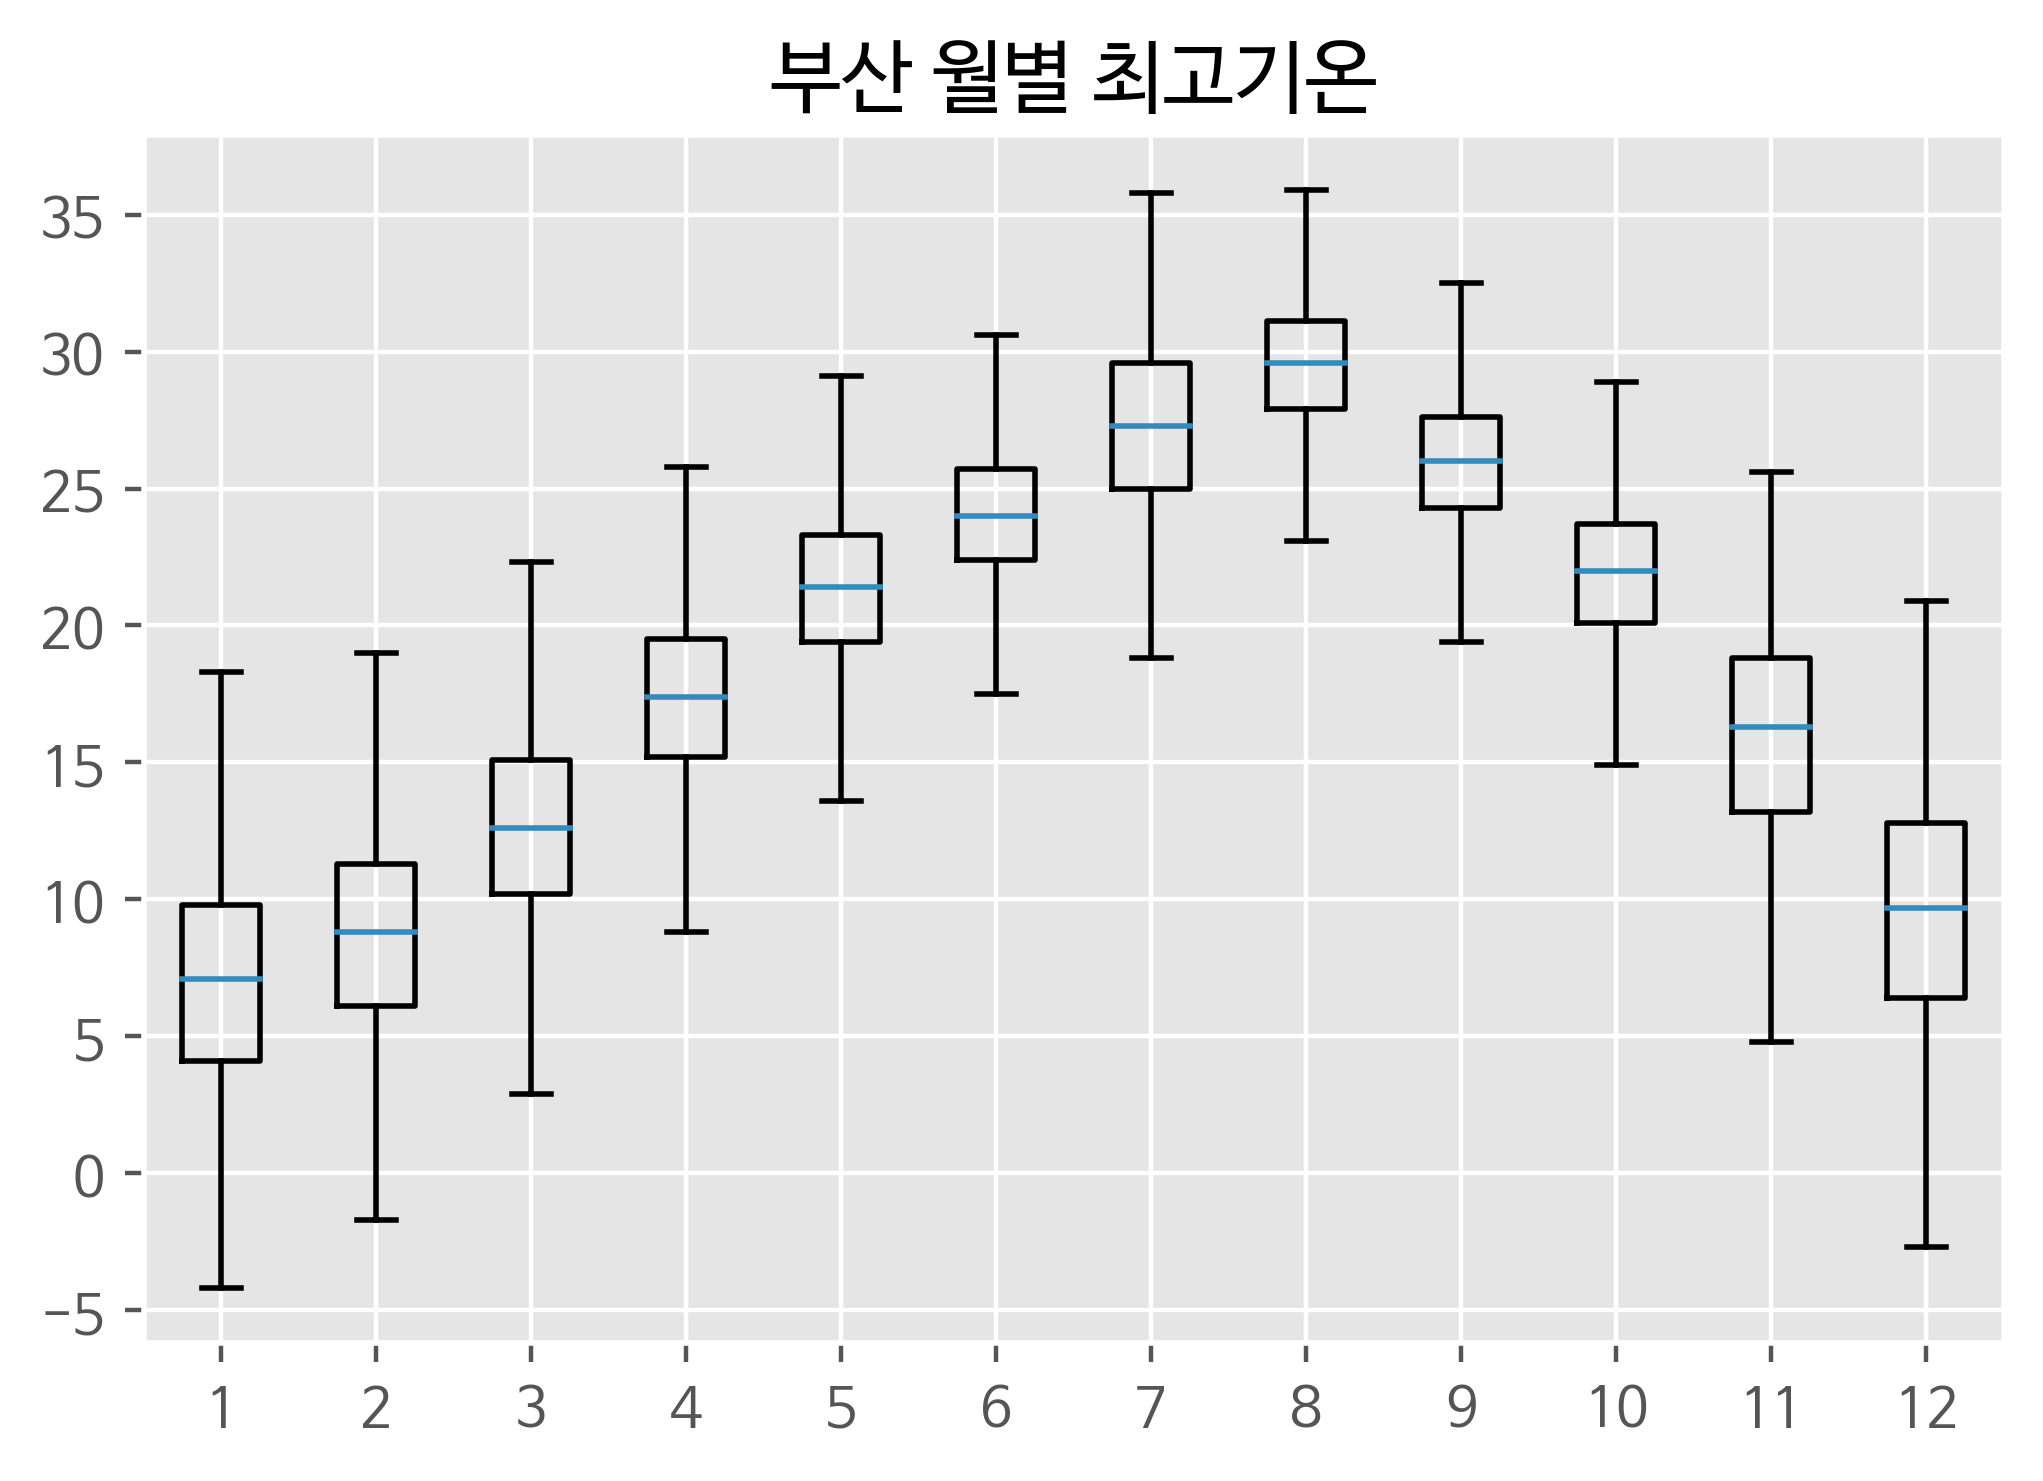

In [ ]:
import csv
import matplotlib.pyplot as plt 

f = open('/content/busan_temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) 

month = [] # 월별 데이터를 저장할 리스트 month 변수 선언
for i in range(12):
  month.append([])   # month 리스트 내에 12개 리스트 생성 [[],[],[]...]

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1])) # int 형으로 만들어서 숫자로 만듬 그 다음에 -1 ex) 1월이면 0번째 방 2월이면 1번째 방...

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.style.use('ggplot')
plt.title('부산 월별 최고기온')
plt.style.use('ggplot')
plt.boxplot(month, showfliers=False)
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기


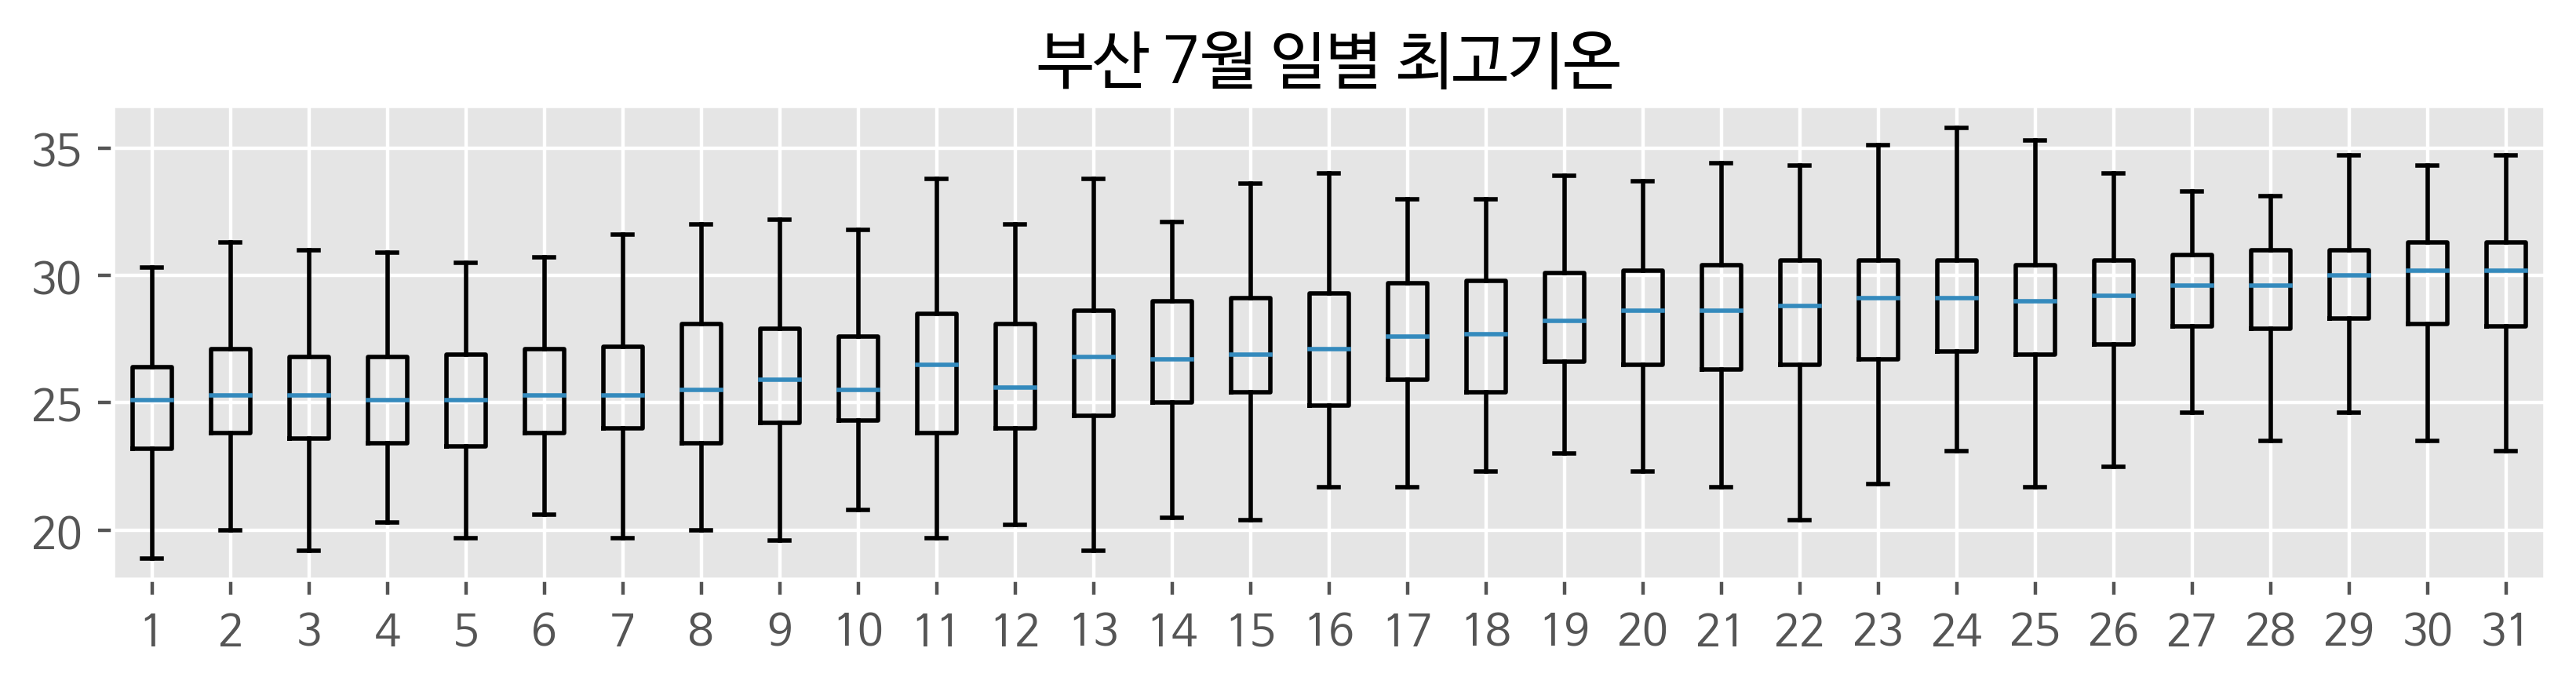

In [ ]:
import csv
import matplotlib.pyplot as plt 

f = open('/content/busan_temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) 

day = [] # 일별 데이터를 저장할 리스트 day 변수 선언
for i in range(31):
  day.append([])   # day 리스트 내에 31개 리스트 생성 [[],[],[]...]

for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '07':
      day[int(row[0].split('-')[2])-1].append(float(row[-1])) # 8월 최고 기온 값 저장 day[0] -> 1일

plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,2), dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title('부산 7월 일별 최고기온')
plt.boxplot(day,showfliers=False) # 아웃라이어(이상치) 값 생략
plt.show()